# KNN Classifier

Analyze data white_wine.csv   
* Apply KNN Method (k = 3)
    * target : quality (quality >6 → Y = 1)
    * features : density alcohol
* Validate the model using accuracy in 20% testing data
* Apply scaling and Validate the model using accuracy in 20% testing data
* Apply scaling Choose Factor K based on accuracy:
* K = (1, 3, 5,.., 29)


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

## Data

In [2]:
wine= pd.read_csv('white_wine.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [4]:
wine['label']=np.where(wine['quality']>6,1,0)

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


## EDA

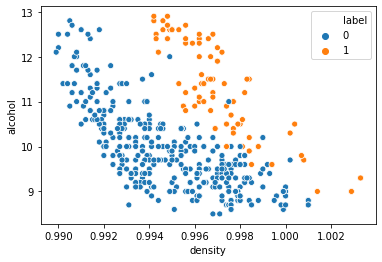

In [6]:
sns.scatterplot(x='density',y='alcohol',data=wine, hue='label')


In [7]:
wine[['alcohol','density']].isna().sum()

alcohol    1
density    0
dtype: int64

In [8]:
wine['alcohol']=wine['alcohol'].fillna(wine['alcohol'].mean())

## Splitting data

In [9]:
x= wine[['alcohol','density']]
y= wine['label']

In [10]:
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

## without scaling

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn= KNeighborsClassifier(n_neighbors=3) #define model
knn.fit(x_train, y_train) #fitting/training
y_predict= knn.predict(x_test) #prediksi

In [13]:
print('Akurasi model KNN di dataset test adalah:', accuracy_score(y_test,y_predict))

Akurasi model KNN di dataset test adalah: 0.9038461538461539


## with scaling

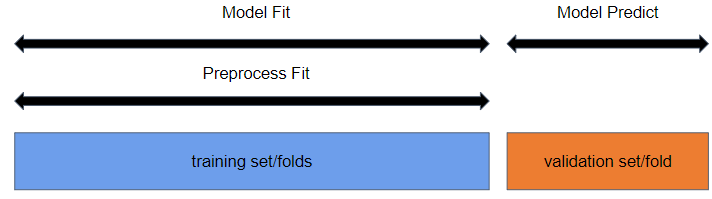

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler= MinMaxScaler() #define transformer
scaler.fit(x_train) #fitting/training
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [16]:
x_train

,alcohol,density
325,10.5,0.9946
273,9.0,0.9949
287,9.0,1.0029
342,9.1,0.9962
323,10.4,0.9946
...,...,...
382,9.2,0.9969
426,10.4,0.9954
489,8.9,0.9962
311,12.5,0.9968


In [17]:
x_train_scaled

array([[0.45454545, 0.34586466],
       [0.11363636, 0.36842105],
       [0.11363636, 0.96992481],
       [0.13636364, 0.46616541],
       [0.43181818, 0.34586466],
       [0.15909091, 0.63909774],
       [0.56818182, 0.12781955],
       [0.34090909, 0.45112782],
       [0.09090909, 0.46616541],
       [0.52272727, 0.15037594],
       [0.09090909, 0.54135338],
       [0.29545455, 0.61654135],
       [0.43181818, 0.15037594],
       [0.20454545, 0.54135338],
       [0.45454545, 0.59398496],
       [0.09090909, 0.54135338],
       [0.45454545, 0.13533835],
       [0.45454545, 0.30075188],
       [0.22727273, 0.4887218 ],
       [0.45454545, 0.28571429],
       [0.97727273, 0.03759398],
       [0.88636364, 0.36090226],
       [0.61363636, 0.42105263],
       [0.18181818, 0.63157895],
       [0.06818182, 0.63157895],
       [0.18181818, 0.54135338],
       [0.79545455, 0.05263158],
       [0.18181818, 0.58646617],
       [0.13636364, 0.53383459],
       [0.31818182, 0.36842105],
       [0.

In [18]:
knn= KNeighborsClassifier(n_neighbors=3) #define model
knn.fit(x_train_scaled, y_train) #fitting/training
y_predict= knn.predict(x_test_scaled) #prediksi

In [19]:
print('Akurasi model KNN di dataset test adalah:', accuracy_score(y_test,y_predict))

Akurasi model KNN di dataset test adalah: 0.9807692307692307


Nilai akurasi meningkat dari 90% menjadi 98% setelah menggunkan scaling.

## choose factor K

In [20]:
import matplotlib.pyplot as plt

In [21]:
k= range(1,30,2)
testing_score=[]
training_score=[]
score=0

for i in k:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    
    y_predict_train= knn.predict(x_train_scaled,)
    training_score.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= knn.predict(x_test_scaled)
    acc_score=accuracy_score(y_test,y_predict_test)
    testing_score.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_k=i

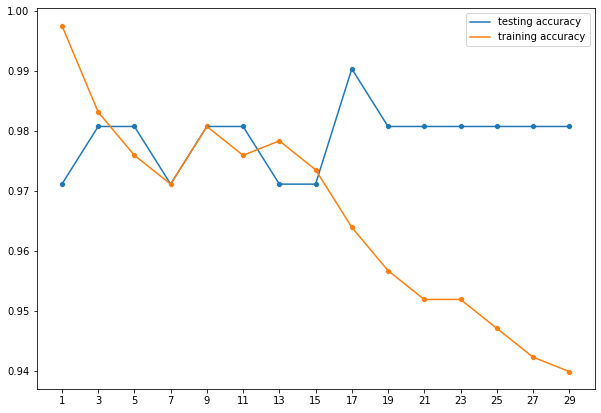

In [22]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_score)
sns.scatterplot(k,testing_score)
sns.lineplot(k,training_score)
sns.scatterplot(k,training_score)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xticks(list(k))
plt.show()

In [23]:
print('best k:', best_k)
print('best_score:', score)

best k: 17
best_score: 0.9903846153846154


Jumlah k (n neighbors) terbaik adalah 17 dengan score 99%, meningkat lagi dari sebelumnya 98%

# Decision Tree Classifier

Analyze data white_wine.csv  
* Apply Decision Tree Classification Method (max_depth = 2)
    * target : quality (quality > 6 → Y = 1)
    * features : density alcohol
* Validate the model using accuracy in 20% testing data
* Apply scaling and Validate the model using accuracy in 20% testing data
* Check the performance: is there any difference whether we applied scaling or not ?
* Check the tree: is there any difference whether we applied scaling or not ?


## Without Scaling

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree= DecisionTreeClassifier(max_depth=2)
tree.fit(x_train,y_train)
y_predict=tree.predict(x_test)

In [30]:
print('Nilai akurasi model ini:', accuracy_score(y_test,y_predict))

Nilai akurasi model ini: 0.9519230769230769


In [31]:
from sklearn.tree import plot_tree

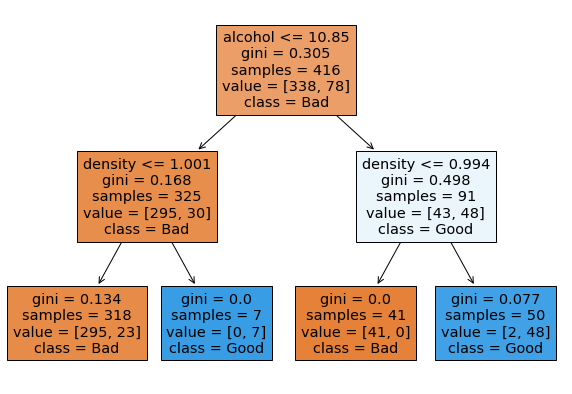

In [36]:
plt.figure(figsize=(10,7))
plot_tree(tree,feature_names= list(x),class_names=['Bad','Good'], filled=True)
plt.show()

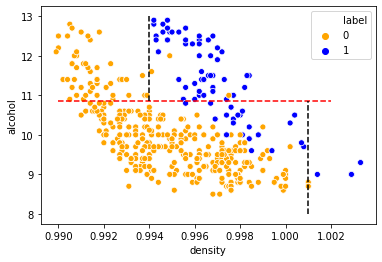

In [84]:
sns.scatterplot(x='density',y='alcohol',data=wine, hue='label', palette=['orange','blue'])

plt.plot([0.990,1.002],[10.85,10.85],'r--')
plt.plot([1.001,1.001],[8,10.85],'k--')

plt.plot([0.994,0.994],[10.85,13],'k--')

## With Scaling

In [47]:
tree= DecisionTreeClassifier(max_depth=2)
tree.fit(x_train_scaled,y_train)
y_predict=tree.predict(x_test_scaled)

In [48]:
print('akurasi setelah scaling=', accuracy_score(y_test,y_predict))

akurasi setelah scaling= 0.9519230769230769


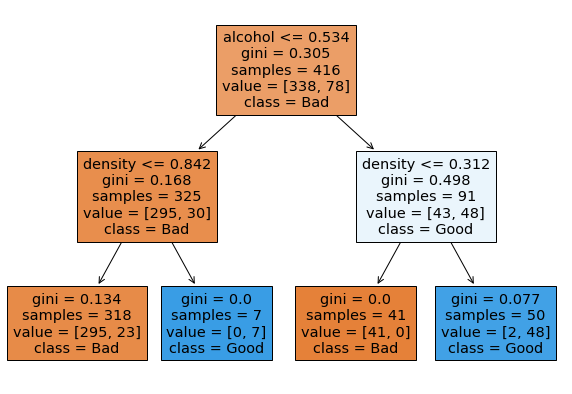

In [49]:
plt.figure(figsize=(10,7))
plot_tree(tree,feature_names=list(x), class_names=['Bad','Good'], filled=True)
plt.show()

Scaling **tidak** mempengaruhi performa dari decision tree, tapi bisa menyulitkan intepretasi pohon keputusan.

Misal, di pohon pertama, kita bisa tau kalau wine dengan konsentrasi alkohol di bawah 10.85% dan density di bawah 1.001 akan diprediksi sebagai _bad_ wine. Di pohon kedua, angka ini menajdi angka hasil scaling yang tidak ada artinya, sehingga lebih sulit dimengerti. 

# Latihan
Gunakan data titanic dari seaborn.  
* target=survived  
* fitur= 'pclass','sex','age','fare'  



* isi missing value  
* split data menjadi train dan test (80:20)
* bandingkan performa model berikut:
    * logistic regresi tanpa scaling
    * Logistic regresi dengan scaling
    * KNN tanpa scaling
    * KNN dengan scaling
    * Decision Tree 